مینا ایلخانی ۶۱۰۳۹۸۱۹۱

functions to create new features

In [1]:
def is_english(token):
    token = str(token)
    for t in token:
        if t in "qwertyuiopasdfghjklzxcvbnm" :
            return 1
    return 0

In [2]:
def len_token(token):
    return len(token)

In [3]:
def end_with(token):
    token = str(token)
    if token[-1]  in "-=!@#$%^&*()_+<>?:|}{'/\,." :
        return 'punctuation' 
    elif token[-1] in '۱۲۳۴۵۶۷۸۹۰':
        return 'pars_num'
    elif token[-1].isnumeric():
        return 'en_num'
    return token[-1]

In [4]:
def is_verb(pos_tag):
    return  str(pos_tag).startswith('V')

read datasset

In [5]:
import pandas as pd
df = pd.read_csv("updated_bijankhan_corpus.csv")
df

,Unnamed: 0,token,pos_tag,ezafe_tag
0,0,!هنری!,SUBJ,0
1,1,#,DELM,0
2,2,مسعود,N_SING_PR,1
3,3,شجاعی,N_SING_PR,1
4,4,طباطبایی,N_SING_PR,0
...,...,...,...,...
2602531,2602531,مصنوعی,ADJ_SIM,0
2602532,2602532,ایجاد,N_SING_COM,0
2602533,2602533,شده,ADJ_INO,0
2602534,2602534,است,V_PRE_SIM,0


In [6]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df

,token,pos_tag,ezafe_tag
0,!هنری!,SUBJ,0
1,#,DELM,0
2,مسعود,N_SING_PR,1
3,شجاعی,N_SING_PR,1
4,طباطبایی,N_SING_PR,0
...,...,...,...
2602531,مصنوعی,ADJ_SIM,0
2602532,ایجاد,N_SING_COM,0
2602533,شده,ADJ_INO,0
2602534,است,V_PRE_SIM,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602536 entries, 0 to 2602535
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   token      object
 1   pos_tag    object
 2   ezafe_tag  int64 
dtypes: int64(1), object(2)
memory usage: 59.6+ MB


0    2016358
1     586178
Name: ezafe_tag, dtype: int64

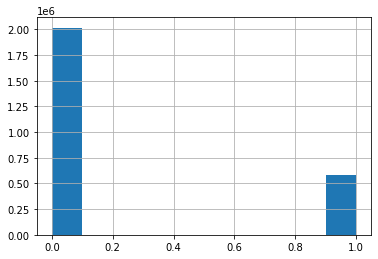

In [8]:
df['ezafe_tag'].hist()
df['ezafe_tag'].value_counts()

In [9]:
print("num of position tag:", len(df["pos_tag"].unique()))

num of position tag: 483


there is not 483 position tag in Persian. In some pos tags _ I guess it means that the word has several position tag

In [10]:
new = df["pos_tag"].str.split("_", n = 7, expand = True)
new

,0,1,2,3,4,5
0,SUBJ,None,None,None,None,None
1,DELM,None,None,None,None,None
2,N,SING,PR,None,None,None
3,N,SING,PR,None,None,None
4,N,SING,PR,None,None,None
...,...,...,...,...,...,...
2602531,ADJ,SIM,None,None,None,None
2602532,N,SING,COM,None,None,None
2602533,ADJ,INO,None,None,None,None
2602534,V,PRE,SIM,None,None,None


هر کلمه حداکثر 6 نقش دارد

In [11]:
tag1 = []
for i in range(6):
    tag1.append(list(new[i].unique()))

tag2 = []
for colUnique in tag1:
    for e in colUnique:
       tag2.append(e)
tag2 = pd.Series(tag2)
len(tag2.unique())

153

So there are 153 different position tag. It would not be good to take each position tag as a feature because the number of columns increases.

ezafe_tag of Verbs should be 0 .We check the correctness of this. 

This could be done with the parsivar library

225674
225674
0


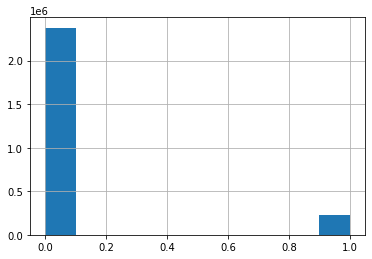

In [12]:
df['is_verb'] = df['pos_tag'].apply(is_verb).astype(int)
df['is_verb'].hist()

print(len(df.loc[ (df['is_verb'] == 1)  ]))
print(len(df.loc[ (df['is_verb'] == 1 ) & (df['ezafe_tag'] == 0)  ]))
print(len(df.loc[ (df['is_verb'] == 1 ) & (df['ezafe_tag'] == 1)  ]))

So for all of the words which V is in it's pos_tag ==> ezafe_tag is 0

Ezafe_tag should not be 1 for tekens that do not end in letters or are English. We check the correctness of this statement

798
729
69


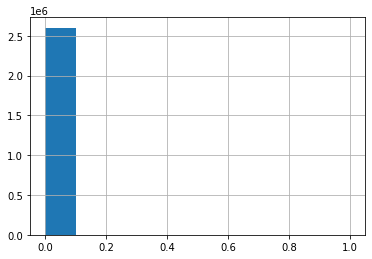

In [13]:
df['is_eng'] = df['token'].apply(is_english).astype(int)
df['is_eng'].hist()
print(len(df.loc[ (df['is_eng'] == 1)  ]))
print(len(df.loc[ (df['is_eng'] == 1 ) & (df['ezafe_tag'] == 0)  ]))
print(len(df.loc[ (df['is_eng'] == 1 ) & (df['ezafe_tag'] == 1)  ]))

Ezafe_tag is 1 for some tekens that are English :)

for example:
(ویندوز desktop روی)

In [14]:
df.drop('is_eng', inplace=True, axis=1)

In [15]:
df['ends_with'] = df['token'].apply(end_with)
print(len(df.loc[ (df['ends_with'] == 'punctuation')  ]))
print(len(df.loc[ (df['ends_with'] == 'punctuation' ) & (df['ezafe_tag'] == 0)  ]))
print(len(df.loc[ (df['ends_with'] == 'punctuation' ) & (df['ezafe_tag'] == 1)  ]))

143664
143664
0


So whether the token ends with punctuation or not can be a good feature (the second good feature I found)

ends with numbers:

In [16]:
print(len(df.loc[ (df['ends_with'] == 'par_num')  ]))
print(len(df.loc[ (df['ends_with'] == 'en_num' )  ]))

print(len(df.loc[ (df['ends_with'] == 'en_num' ) & (df['ezafe_tag'] == 0)  ]))
print(len(df.loc[ (df['ends_with'] == 'en_num' ) & (df['ezafe_tag'] == 1)  ]))

0
43116
40177
2939


Ezafe_tag is 1 for some tekens that ends with nubmers :)

for example:
(کودتای ۲۸ مرداد)


Ezafe_tag is not 1 for tekens that end in «آ،ا،و،ه» . We check the correctness of this statement and also «ی» 

ی

142398
192260

21662
13572
8090

7652
6384
1268

21
10
11



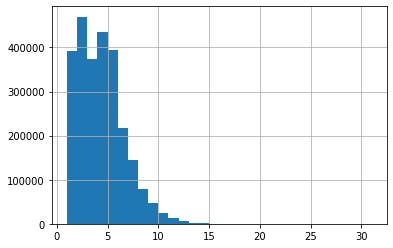

In [17]:
df['token_len'] = df['token'].apply(len_token)

df['token_len'].hist(bins=30)

print(len(df.loc[ (df['ezafe_tag'] == 1) & (df['ends_with'] == 'ی')  ]))
print(len(df.loc[ (df['ezafe_tag'] == 0) & (df['ends_with'] == 'ی')  ]))
print()
print(len(df.loc[ (df['token_len'] == 3 ) & (df['ends_with'] == 'ی')  ]))
print(len(df.loc[ (df['token_len'] == 3 ) & (df['ends_with'] == 'ی') & (df['ezafe_tag'] == 0)  ]))
print(len(df.loc[ (df['token_len'] == 3 ) & (df['ends_with'] == 'ی') & (df['ezafe_tag'] == 1)  ]))
print()
print(len(df.loc[ (df['token_len'] == 2 ) & (df['ends_with'] == 'ی')  ]))
print(len(df.loc[ (df['token_len'] == 2 ) & (df['ends_with'] == 'ی') & (df['ezafe_tag'] == 0)  ]))
print(len(df.loc[ (df['token_len'] == 2 ) & (df['ends_with'] == 'ی') & (df['ezafe_tag'] == 1)  ]))
print()
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'ی')  ]))
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'ی') & (df['ezafe_tag'] == 0)  ]))
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'ی') & (df['ezafe_tag'] == 1)  ]))
print()

The cases examined above also did not find a significant relationship

most tokens are 1 to 6 in length 

و،ه،آ

In [18]:
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'آ')  ]))
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'آ') & (df['ezafe_tag'] == 0)  ]))
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'آ') & (df['ezafe_tag'] == 1)  ]))
print()
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'ا')  ]))
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'ا') & (df['ezafe_tag'] == 0)  ]))
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'ا') & (df['ezafe_tag'] == 1)  ]))
print()
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'و')  ]))
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'و') & (df['ezafe_tag'] == 0)  ]))
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'و') & (df['ezafe_tag'] == 1)  ]))
print()
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'ه')  ]))
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'ه') & (df['ezafe_tag'] == 0)  ]))
print(len(df.loc[ (df['token_len'] == 1 ) & (df['ends_with'] == 'ه') & (df['ezafe_tag'] == 1)  ]))
print()

29
28
1

14
14
0

120557
120477
80

71
30
41



If "ا" comes at the end of the token, it is not possible for the ezafe_tag to be 1, but it will not be effective because its number is very small. But to be sure, I will examine its effect when creating the model

In [19]:
print(len(df.loc[  (df['ends_with'] == 'ی')  ]))
print(len(df.loc[  (df['ends_with'] == 'ي')  ]))
print()
print(len(df.loc[  (df['ends_with'] == 'ك')  ]))
print(len(df.loc[  (df['ends_with'] == 'ل')  ]))
print()
print(len(df.loc[  (df['ends_with'] == 'ه')  ]))
print(len(df.loc[  (df['ends_with'] == 'ة')  ]))


334658
0

0
65352

319145
0


I checked that the text did not use "ی, ئ", "ک, ك" and "ه, ة" at the same time

that is clear that stemming and Lemmatization can't help

ezafe_tag can't be 1 for the tokens that end in "مان،تان،شان" . But we may have exceptions. "نشان" for example

In [20]:
df

,token,pos_tag,ezafe_tag,is_verb,ends_with,token_len
0,!هنری!,SUBJ,0,0,punctuation,6
1,#,DELM,0,0,punctuation,1
2,مسعود,N_SING_PR,1,0,د,5
3,شجاعی,N_SING_PR,1,0,ی,5
4,طباطبایی,N_SING_PR,0,0,ی,8
...,...,...,...,...,...,...
2602531,مصنوعی,ADJ_SIM,0,0,ی,6
2602532,ایجاد,N_SING_COM,0,0,د,5
2602533,شده,ADJ_INO,0,0,ه,3
2602534,است,V_PRE_SIM,0,1,ت,3


Non-numeric types can not be used when creating the model. So we get the corresponding numbers in each feature

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['pos_tag'] = labelencoder.fit_transform(df['pos_tag'])
df['token'] = labelencoder.fit_transform(df['token'])
df['ends_with'] = labelencoder.fit_transform(df['ends_with'])

In Persian, in addition to the role of the word itself, the role of the next and previous word can also effect ezafe tag, for example درخت پیر دانا

In [22]:

df['is_verb'] = labelencoder.fit_transform(df['is_verb'])
df["next_pos_tag"] = df['pos_tag'].shift(periods=-1)
df["prev_pos_tag"] = df['pos_tag'].shift(periods=1)
df['next_pos_tag'] = labelencoder.fit_transform(df['next_pos_tag'])   # convert NaN
df['prev_pos_tag'] = labelencoder.fit_transform(df['prev_pos_tag'])
df

,token,pos_tag,ezafe_tag,is_verb,ends_with,token_len,next_pos_tag,prev_pos_tag
0,136,248,0,0,46,6,65,483
1,192,65,0,0,46,1,167,248
2,53399,167,1,0,73,5,167,65
3,39644,167,1,0,106,5,167,167
4,42224,167,0,0,106,8,65,167
...,...,...,...,...,...,...,...,...
2602531,53973,23,0,0,106,6,121,121
2602532,12291,121,0,0,73,5,18,23
2602533,39693,18,0,0,91,3,423,121
2602534,7714,423,0,1,68,3,65,18


<AxesSubplot:>

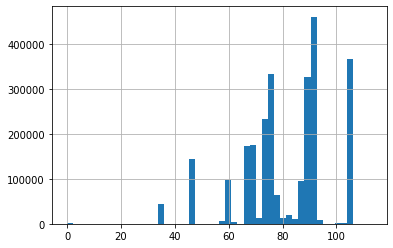

In [23]:
df['ends_with'].hist(bins=50)

Use all data except the last 100,000 for Train and the last 100,000 for Test

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

def model(X, y, decision):
    trainX, testX, trainY, testY = X[:-100000], X[-100000:],y[:-100000], y[-100000:]
    decision.fit(trainX, trainY)
    predY = decision.predict(testX)
    return accuracy_score(y_true=testY, y_pred=predY)*100, precision_score(predY, testY, average='binary')*100, recall_score(predY, testY, average='binary')*100

In [25]:
X = ['token','pos_tag','is_verb','ends_with','token_len','next_pos_tag', 'prev_pos_tag']
y = df['ezafe_tag']

In [26]:
# from sklearn.svm import SVC
# decision = SVC()
# print(model(df[X], y, decision ))

SCV is very slow 

In [27]:
from sklearn.naive_bayes import MultinomialNB

print('accuracy_score  precision_score   recall_score')

decision = MultinomialNB(alpha=0.8)
print(model(df[X], y, decision ))

decision = MultinomialNB(alpha=0.4)
print(model(df[X], y, decision ))

decision = MultinomialNB(alpha=0.01)
print(model(df[X], y, decision ))


accuracy_score  precision_score   recall_score
(63.243, 59.59132271693207, 35.3648834349912)
(63.365, 59.59132271693207, 35.46920714752037)
(63.668, 59.59132271693207, 35.73098845423101)


In [28]:
from sklearn import tree
decision = tree.DecisionTreeClassifier()
print(model(df[X], y, decision ))

(96.489, 92.65112122196945, 93.05561222408095)


This model works well both in time and accuracy

In [29]:
# from sklearn.neural_network import MLPClassifier
# decision = MLPClassifier(hidden_layer_sizes=(2,), random_state=0, max_iter=100, alpha=0.01)
# print(model(df[X], y, decision ))

MLP is very slow

DecisionTree is the best model.

now feature selection:

In [30]:
decision = tree.DecisionTreeClassifier()
# print('accuracy_score  precision_score   recall_score')

# from itertools import combinations
# for i in range (3, 7):
#     for a in (combinations(X, i)):
#         a = list(a)
#         print(a)
#         print(model(df[a], y, decision ))

To check the effect of each feature, I checked all the 3 to 6 selections (I commented because it was time consuming)

Results:

Those with higher accuracy, precision, and recall used the next_pos_tag

Somewhere we have the lowest precision (between 20 and 40%) of the verb feature used

It is not possible for recall to be high and accuracy and precision to be low

If we use the token itself, the recall will be high

The last letter and the position tag of the token and the position tag of the next token are the most effective features

best answers:

In [31]:
print('accuracy_score  precision_score   recall_score')

print(model(df[['token', 'pos_tag',            'ends_with',              'next_pos_tag', 'prev_pos_tag']], y, decision ))
print(model(df[['token', 'pos_tag', 'is_verb', 'ends_with',              'next_pos_tag', 'prev_pos_tag']], y, decision ))
print(model(df[['token', 'pos_tag',            'ends_with', 'token_len', 'next_pos_tag', 'prev_pos_tag']], y, decision ))
print(model(df[[         'pos_tag',            'ends_with', 'token_len', 'next_pos_tag'                ]], y, decision ))
print(model(df[[         'pos_tag', 'is_verb', 'ends_with', 'token_len', 'next_pos_tag'                ]], y, decision ))

accuracy_score  precision_score   recall_score
(96.52, 92.78518037049074, 93.0573663624511)
(96.532, 92.80142996425089, 93.08883455582722)
(96.46900000000001, 92.5617484562886, 93.05697365734122)
(95.891, 95.34449138771531, 88.79052699277419)
(95.884, 95.33636659083523, 88.77288545922227)
